In [17]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def bino(n, k):
    def eratosthenes_simple_numbers(N):
        yield 2
        nonsimp = set()
        for i in range(3, N + 1, 2):
            if i not in nonsimp:
                nonsimp |= {j for j in range(i * i, N + 1, 2 * i)}
                yield i
    def calc_pow_in_factorial(a, p):
        res = 0
        while a:
            a //= p
            res += a
        return res
    ans = 1
    for p in eratosthenes_simple_numbers(n):
        ans *= p ** (calc_pow_in_factorial(n, p) - calc_pow_in_factorial(k, p) - calc_pow_in_factorial(n - k, p))
    return ans

In [23]:
def f1(n): #Pdiamond
    x=0
    for j in range(n+1):
        xx = (bino(n,j))**2 *(bino(2*j,j))*(bino(2*n-2*j,n-j))
        x+=xx
    return x

def f2(n): #Pfcc
    y=0
    for j in range(n+1):
        yy = bino(n,j)*((-4)**(n-j)) *f1(j)
        y+=yy
    return float(y)/12**n

def F(n): #FPfcc
    y = [1]
    if n==0: return y[0]
    else:  
        m = 1
        while m<=n:
            yy=0
            for i in range(m-1):
                j=i+1
                yy+=f2(m-j)*y[j]
            y.append(f2(m)-yy)    
            m+=1
    return y

In [39]:
#return at step n for j times
def Fj(n,j):
    y = F(n)
    print(y)
    y[0]=0 #Fj in row j-1
    k=list(y)
    Fnj=[y[-1]]
    jj = 2
    while jj<=j:
        nlist = []
        for nn in range(n+1): #get Fjj for all n 
            g=0
            for i in range(nn): #get Fjj for nn
                i+=1
                g+= y[i]*k[nn-i]
            nlist.append(g)
        jj+=1
        k=list(nlist)
        Fnj.append(k[-1])
    return Fnj #Fn at j=0 to input J
       
Fj(2,1),1./12

[1, 0.0, 0.08333333333333333]


([0.08333333333333333], 0.08333333333333333)

In [46]:
def Hn(alpha,n): #prob of first succesful return after step n
    sm = 0
    F=Fj(n,n/2)
    for j in range(int(n/2)):
        j+=1
        sm+=F[j-1]*(1-alpha)**(j-1)
    return alpha*sm

Hn(0.5,3),4.5*0.5/144

[1, 0.0, 0.08333333333333333, 0.027777777777777776]


(0.013888888888888888, 0.015625)

In [6]:
alpha =0.296
prob = [Hn(alpha,step+1) for step in range(10)]

In [9]:
print sum(prob)

0.057707239577


In [70]:
import os
def loadata(fname):
    namelist = os.listdir(fname)
    norun = len(namelist)
    print norun
    ret = np.array([])
    for name in namelist:
        dat = np.loadtxt(fname+name,delimiter=',')   
        ret =  np.r_[ret,dat]
    return ret,norun

def gethist2(fname): #to get rxn fraction for each discrete t
    ret,norun = loadata(fname)
    uq,uqcnt = np.unique(ret,return_counts=True)
    freq = [float(i)/10000/norun for i in uqcnt]
    #for i,j in zip(uq,uqcnt): print i,j
    #plt.loglog(freq,'.')
    return freq
    
freq1 = gethist2("data/fpt_01kD_L1_short/")    
freq2 = gethist2("data/fpt_001kD_L1_short/")    

400
900


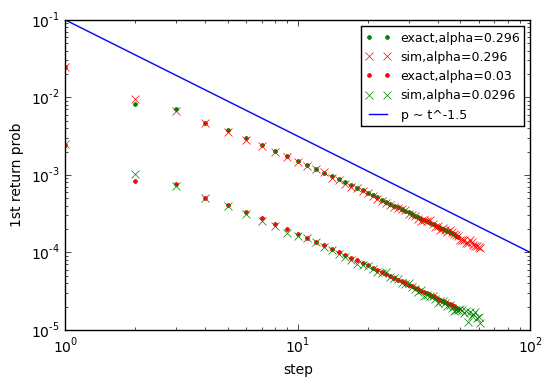

In [80]:
plt.loglog(range(len(prob)),prob,'g.',label='exact,alpha=0.296')
plt.loglog(np.linspace(1,len(freq1),len(freq1)),freq1,'rx',label='sim,alpha=0.296')

plt.loglog(range(len(prob2)),prob2,'r.',label='exact,alpha=0.03')
plt.loglog(np.linspace(1,len(freq2),len(freq2)),freq2,'gx',label='sim,alpha=0.0296')

z = lambda x: 0.1*(x**-1.5) #t^(-0.5)
plt.plot(np.logspace(0,2,10),z(np.logspace(0,2,10)),label='p ~ t^-1.5')
plt.xlabel('step')
plt.ylabel('1st return prob')
plt.legend(fontsize=9)               

In [66]:
np.linspace(2,10+1,10)

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.])

In [14]:
import numpy as np
def Fna(n,f):
    g = 0.5772156649
    A=np.log(f*n)
    t1=(2*np.pi/3**0.5)*(1/A)
    t2=(2*np.pi/3**0.5)*(1/A-g/A**2)
    t3=(np.pi)*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3)
    return t1,t2,t3

In [16]:
Fna(50,16)

(0.4373736456710924, 0.4069350866256861, 0.3451933643012166)